# CO Oxidation Example on Pd(111) by Zacros and Zacros Wrapper

## Reference

[1]. [Zacros Website](http://zacros.org/)

[2]. [Zacros Wrapper Repository](https://github.com/VlachosGroup/Zacros-Wrapper)

[3]. [Stamatakis, M.; Vlachos, D. G. A Graph-Theoretical Kinetic Monte Carlo Framework for on-Lattice Chemical Kinetics. J. Chem. Phys. 2011, 134 (21), 214115.](https://aip.scitation.org/doi/abs/10.1063/1.3596751)

[4]. [Nielsen, J.; D’Avezac, M.; Hetherington, J.; Stamatakis, M. Parallel Kinetic Monte Carlo Simulation Framework Incorporating Accurate Models of Adsorbate Lateral Interactions. J. Chem. Phys. 2013, 139 (22), 224706.](https://aip.scitation.org/doi/abs/10.1063/1.4840395)

[5] [Núñez, M.; Robie, T.; Vlachos, D. G. Acceleration and Sensitivity Analysis of Lattice Kinetic Monte Carlo Simulations Using Parallel Processing and Rate Constant Rescaling. J. Chem. Phys. 2017, 147 (16).](https://aip.scitation.org/doi/abs/10.1063/1.4998926)

[6] [Piccinin, S.; Stamatakis, M. CO Oxidation on Pd ( 111 ): A First-Principles-Based Kinetic Monte Carlo Study. 2014, No. 111.](https://pubs.acs.org/doi/abs/10.1021/cs500377j)


# Table of contents

- [1. KMC vs MKM](#1)


- [2. Lattice kMC](#2)


- [3. Zacros - Graph Theoretical kMC Software](#3)


- [4. Zacros Wrapper](#4)


- [5. CO Oxidation Example](#5)
    
    - [5.1. Energetics](#51)
    
    - [5.2. Lattice](#52)
    
    - [5.3. Mechanism](#53)
    
    - [5.4. Simulation](#54)
    
    - [5.5. State](#55)


- [6. Results](#6)

    - [6.1. Surface Species Over Time](#61)
    
    - [6.2. Gas Species Over Time](#62)
  
    - [6.3. Elementary Step Frequencies](#63)
    
    - [6.4. Lattice](#64)
    
    - [6.5. Lattice Frames (Snapshots)](#65)

# 1. KMC vs MKM<a name="1"></a>


| Methods       | Kinetic Monte Carlo (KMC)  | Micro-Kinetic Modeling (MKM) |
| ------------- |:-------------:| -----:|
| Complex Chemistries    |  Y |  Y |
| Ab-initio kinetic constants |  Y    |   Y|
| Surface inhomogeneity |   Y  |    N |
| Accurate lateral interactions |   Y |   N  |
| Discrete event time prediction |   Y    |  N   |
| Computationally inexpensive |  N  |  Y  |


Comparing to molecular dynamics (MD), kMC focuses on rare events (barrier crossing)
![rarevents](input_graphics/rarevents.png)




# 2. Lattice kMC Overview<a name="2"></a>

![structures](input_graphics/structures.png)
 
Suitable for systems with Multiple facets, nanoparticles, clusters, multifunctional materials

 - Stochastic formulation 
 
 - Resolves surface inhomogeneity
 
 - Captures time-scales of individual events

# 3. Zacros - Graph Theoretical kMC Software<a name="3"></a>
 - Program created for Lattice Monte Carlo
 
 - Inputs:
     - Energetics – Cluster-Expansion Hamiltonian [[4]](https://aip.scitation.org/doi/abs/10.1063/1.4840395) to describe lateral interaction
     - Lattice – Unit cell, iterations of unit cell, and interactions between lattice sites
     - Mechanisms – Kinetics of elementary steps (reactions and phase transitions)
     - Simulation – Initial conditions (temperature and pressure), present species, run time
     - State – Initial locations of molecules on lattice
 
 - Outputs:
     - General – Inputs to simulation, time and iterations
     - History – Provides records of KMC steps by time
     - Lattice – State of each site on lattice
     - Process Statistics – Provides records of KMC steps by event
     - Species Number – Species populations over time
 
 - Flow chart:
 ![flowchart](input_graphics/flowchart.png)

# 4. Zacros Wrapper<a name="4"></a>

Includes additional features:

- Run KMC simulations with parallel processing
- Visualize and process output files 
- Rate constant rescaling for stiff systems to accelerate simulations
- Sensivity analysis using the likelihood ratio method

The details can be found on GitHub and in ref[[5]](https://aip.scitation.org/doi/abs/10.1063/1.4998926)

# 5. CO Oxidation Example<a name="5"></a>
Simulate reactions between lattice O, gas phase CO to produce CO2 on a Pd(111) surface (ref [[6]](https://pubs.acs.org/doi/abs/10.1021/cs500377j))
     
- Use 190K and 320K to compare effects of temperature on reaction rates and surface coverages

We use Zacros to run these simulations and Zacros Wrapper to analyze the output. The following inputs were given:

## 5.1 Energetics<a name="51"></a>

#### O Lattice Configurations ![O Lattice Configurations](input_graphics/O_configs.png)

#### CO Lattice Configurations ![CO Lattice Configurations](input_graphics/CO_configs.png)

#### O and CO Lattice Configurations ![O and CO Lattice Configurations](input_graphics/O_CO_configs.png)

## 5.2 Lattice<a name="52"></a>
2 sites in a unit cell: FCC and HCP <br>
Periodic cell pattern – 48 by 48 (paper used 96 by 96) <br>
Lattice Interactions: Only half of neighbor cells (north, east, northeast, southeast) counted to avoid repetition
![Lattice Interactions](input_graphics/Lattice_interactions.png)

## 5.3 Mechanism<a name="53"></a>
Elementary Steps:<br>
>CO adsorption on fcc:  $CO(g) + *fcc \leftrightarrow CO*fcc $<br>
CO adsorption on hcp $CO(g) + *hcp \leftrightarrow CO*hcp $<br>
CO* diffusion $CO*fcc \leftrightarrow CO*hcp $ <br>
O* diffusion $CO*fcc \leftrightarrow O*hcp $ <br>
CO oxidation on fcc $CO*fcc + O*fcc \leftrightarrow CO_{2} (g) $ <br>
CO oxidation on hcp $CO*hcp+ O*hcp \leftrightarrow CO_{2} (g) $


#### Kinetic parameters at 320K
![320K Mech](input_graphics/mech_320.png)

#### Kinetic parameters at 190K
![190K mech](input_graphics/mech_190.png)

## 5.4 Simulation<a name="54"></a>
Surface – Pd(111) <br>
Gas species: CO, CO2<br>
Surface Species: O*, CO*<br>

#### 320K:
Data Collected:<br>
>Snapshots: on t = 5s<br>
Process and Species: on t = 0.5s<br>
Run time:<br>
Infinite steps<br>
500s simulation time<br>
86400s (24 hours) wall time<br>

#### 190K
Data collected:<br>
>Snapshots: on t = 600s<br>
Process and Species: on t = 60s<br>
Run time:<br>
Infinite steps<br>
60000s simulation time<br>
86400s (24 hours) wall time

## 5.5 State<a name="55"></a>
Initial Coverage: 25% of lattice sites filled with O*
>Every 4th site contains O*

# 6. Results<a name="6"></a>
Some data, such as post-run statistics, is easy to understand as provided.
#### 320K
Events: 1,504,531 <br>
Frequency: 3009 events per simulated second <br>
Clock Time: 72,022s (20 hours) <br>
Events per clock hour: 75203 <br>
#### 190K
Events: 1,128,541 <br>
Frequency: 18.8 events per simulated second <br>
Clock Time: 59359s (16.5 hours) <br>
Events per clock hour: 68443

In other cases, these results are much easier to read when converted into graphics using Zacros Wrapper.

In [1]:
import os
import sys

# Use the correct path to import zacros wrapper
HomePath = os.path.expanduser('~')
sys.path.append(os.path.join(HomePath, 'Documents', 'GitHub', 'Zacros-Wrapper'))

import zacros_wrapper as zw

''' ------------ User input section ------------ '''
RunPath190 = os.path.join(os.getcwd(),'190K')
RunPath320 = os.path.join(os.getcwd(),'320K')

''' -------------------------------------------- '''

''' Set up data '''
run_190 = zw.kmc_traj()
run_320 = zw.kmc_traj()
run_190.Path = RunPath190
run_320.Path = RunPath320
run_190.ReadAllOutput(build_lattice = True)
run_320.ReadAllOutput(build_lattice = True)

## 6.1 Surface Species Over Time<a name="61"></a>

320K


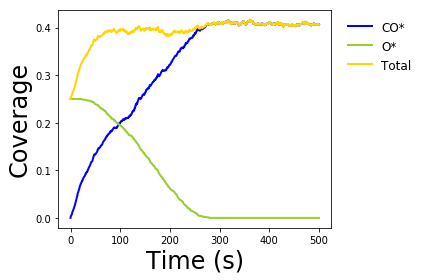

190K


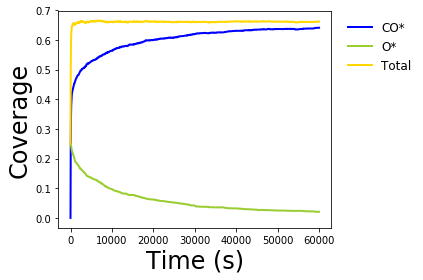

In [2]:
n_Pd = 48 * 48        # number of Pd atoms for normalization
print('320K')
run_320.PlotSurfSpecVsTime(site_norm = n_Pd, savefig = False, incl_total = True)
print('190K')
run_190.PlotSurfSpecVsTime(site_norm = n_Pd, savefig = False, incl_total = True)

In both examples, the coverage of O decreases over time, while more CO is deposited. This occurs much faster at a higher temperature, along with the end lattice having fewer species on it.

Our results are very similar to those from the paper:
![paper surf](Input_graphics/paper_surfspec.png)

## 6.2 Gas Species Over Time<a name="62"></a>

320K


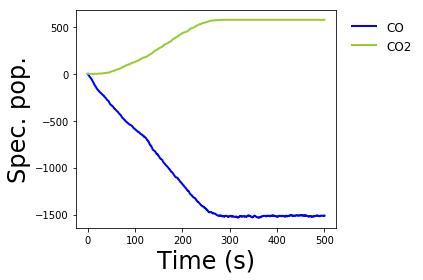

190K


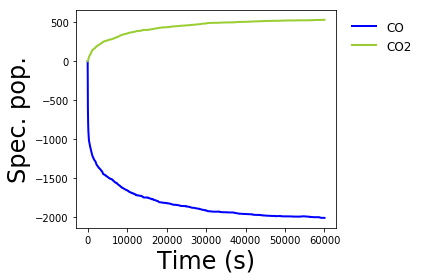

In [3]:
# Plots total counts of gas species
print('320K')
run_320.PlotGasSpecVsTime(savefig = False)                           
print('190K')
run_190.PlotGasSpecVsTime(savefig = False)

In both cases, CO is adsorbed by the lattice and CO2 is released as it forms. Both temperatures produce similar amounts of CO2, but more CO is adsorbed at lower temperatures.

## 6.3 Elementary Step Frequencies<a name="63"></a>

320K


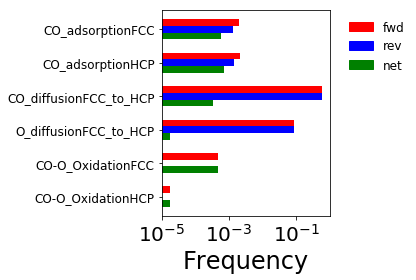

190K


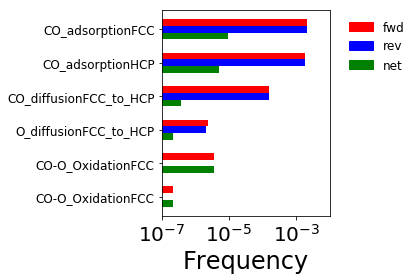

In [4]:
# Plots elementary step frequencies
print('320K')
run_320.PlotElemStepFreqs(site_norm = n_Pd, time_norm = True, savefig = False)   
print('190K')
run_190.PlotElemStepFreqs(site_norm = n_Pd, time_norm = True, savefig = False)

These plots display the frequency of each elementary step described in the energetics input.<br>
Within each temperature, the most frequent step at 320K is movement between the FCC and HCP sites, while the most frequent step at 190K is the adsorption and desorption of CO the lattice sites. Overall, the reaction occurs significantly quicker at a higher temperature.

We can again compare our results to those from the paper to show their similarities:
![paper freq](Input_graphics/paper_frequency.png)

## 6.4 Lattice<a name="64"></a>

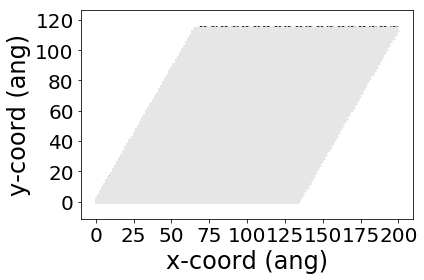

In [5]:
run_190.PlotLattice(savefig = False)    # Plots a picture of the bare lattice
#run_320.PlotLattice()

Here, the empty lattice, which is the same at both temperatures, is displayed.

## 6.5 Lattice Frames (Snapshots)<a name="65"></a>

In [6]:
# creates a subfolder and makes images of each snapshot
run_320.LatticeMovie(savefig = True)                     
run_190.LatticeMovie(savefig = True)

101.0 total snapshots
Draw frame number 1
Draw frame number 2
Draw frame number 3
Draw frame number 4
Draw frame number 5
Draw frame number 6
Draw frame number 7
Draw frame number 8
Draw frame number 9
Draw frame number 10
Draw frame number 11
Draw frame number 12
Draw frame number 13
Draw frame number 14
Draw frame number 15
Draw frame number 16
Draw frame number 17
Draw frame number 18
Draw frame number 19
Draw frame number 20
Draw frame number 21
Draw frame number 22
Draw frame number 23
Draw frame number 24
Draw frame number 25
Draw frame number 26
Draw frame number 27
Draw frame number 28
Draw frame number 29
Draw frame number 30
Draw frame number 31
Draw frame number 32
Draw frame number 33
Draw frame number 34
Draw frame number 35
Draw frame number 36
Draw frame number 37
Draw frame number 38
Draw frame number 39
Draw frame number 40
Draw frame number 41
Draw frame number 42
Draw frame number 43
Draw frame number 44
Draw frame number 45
Draw frame number 46
Draw frame number 47


Images of the lattice are produced at every interval of the snapshot time indicated in the simulation input. For example, these are the lattice snapshots after 1/10 of the interval. The time interval was chosen to show the lattices at a time with both O and CO on the surface.
#### 320K t=50s
![320 snap](320K/lattice_frames/Snapshot_11.png)
#### 190K t=6000s
![190 snap](190K/lattice_frames/Snapshot_11.png)

To make the overall process more visible, the snapshots can be converted into a gif.
#### 320K
![320 gif](320K/lattice_change.gif)
#### 190K
![190 gif](190K/lattice_change.gif)